### Question 1 

The equation of linear SVM is :

w(transposed).x + b = 0

### Question 2

The objective function of a linear SVM is to find the optimal hyperplane that maximizes the margin while minimizing the magnitude of the weight vector w. This objective function can be written as:

Minimize: (1/2) * ||w||

### Question 3 

The kernel trick is a technique used in Support Vector Machines (SVMs) to implicitly transform the input data into a higher-dimensional feature space without explicitly computing the transformation. This transformation allows SVMs to learn complex, nonlinear decision boundaries. The kernel trick works by defining a kernel function, typically denoted as K(x, y), which computes the dot product of the transformed feature vectors in the higher-dimensional space.

### Question 4

Support vectors are the data points from the training dataset that are closest to the decision boundary (hyperplane) of a Support Vector Machine (SVM). They play a crucial role in defining the decision boundary and determining the margin.

### Question 5 

**1. Hyperplane:**
   - The hyperplane is the decision boundary that separates data points of different classes in an SVM.
   - In a two-dimensional feature space, the hyperplane is a line, while in higher dimensions, it's a hyperplane.
   - The goal is to find the hyperplane that maximizes the margin between classes.

**2. Marginal Plane:**
   - The marginal plane is defined by the support vectors, which are the data points closest to the hyperplane.
   - These support vectors determine the position and orientation of the decision boundary.
   - The margin is the distance between the hyperplane and the marginal plane.

**3. Hard Margin:**
   - In a hard-margin SVM, the goal is to find a hyperplane that perfectly separates the two classes without any misclassifications.
   - It works well when the data is linearly separable, meaning a hyperplane can completely separate the classes.
   
**4. Soft Margin:**
   - In cases where the data is not linearly separable or contains outliers, a soft-margin SVM allows for some misclassifications.
   - The soft margin introduces a cost parameter (C) that controls the trade-off between maximizing the margin and allowing misclassifications.
   - A smaller C value allows more misclassifications, while a larger C value enforces a stricter margin.

# Question 6

In [9]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [10]:
from sklearn.datasets import load_iris

In [11]:
dataset = load_iris()

In [13]:
iris = pd.DataFrame(dataset.data, columns=dataset.feature_names)
target = dataset.target

In [14]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
iris["species"] = target

In [17]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:,:-1], iris.iloc[:,-1], random_state=42)

In [19]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(112, 4) (38, 4) (112,) (38,)


In [31]:
svc = SVC(kernel ='linear')
svc

SVC(kernel='linear')

In [32]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [33]:
y_pred = svc.predict(X_test)
print(accuracy_score(y_test, y_pred))

1.0


In [34]:
 # Multiple C values results : 
C_values = [0.1, 1, 10]  # Different values of C for regularization
accuracy_scores = []

for C in C_values:
    svm_classifier = SVC(kernel='linear', C=C)
    svm_classifier.fit(X_train, y_train)

    # Predict labels for the test set
    y_pred = svm_classifier.predict(X_test)

    # Compute the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"Accuracy with C = {C} : {accuracy:.2f}")

Accuracy with C = 0.1 : 1.00
Accuracy with C = 1 : 1.00
Accuracy with C = 10 : 0.97


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


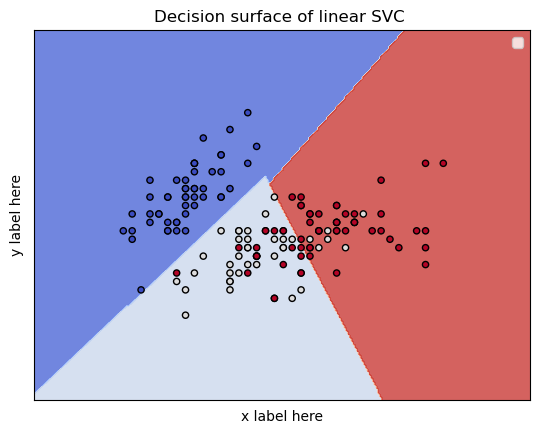

In [45]:
import matplotlib.pyplot as plt

X = iris.iloc[:, :2]  # we only take the first two features.
y = iris.iloc[:,-1]

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = SVC(kernel='linear')
clf = model.fit(X, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X.iloc[:, 0], X.iloc[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

In [46]:
import numpy as np

class LinearSVM:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            # Decision function
            linear_model = np.dot(X, self.weights) + self.bias

            # Hinge loss
            loss = np.maximum(0, 1 - y * linear_model).mean()

            # Calculate gradients
            dW = np.zeros(n_features)
            for i in range(n_samples):
                if y[i] * linear_model[i] < 1:
                    dW += y[i] * X[i]
            dW /= n_samples
            db = -y[y * linear_model < 1].mean()

            # Update weights and bias
            self.weights -= self.lr * dW
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return np.sign(linear_model)

# Example usage
if __name__ == "__main__":
    from sklearn import datasets
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score

    # Load the Iris dataset
    iris = datasets.load_iris()
    X = iris.data[:100, :2]  # Select the first two features for simplicity
    y = iris.target[:100]
    y[y == 0] = -1  # Change class 0 to -1 for binary classification

    # Split the dataset into a training set and a testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Instantiate and train the custom Linear SVM classifier
    custom_svm = LinearSVM(learning_rate=0.01, n_iters=1000)
    custom_svm.fit(X_train, y_train)

    # Predict and evaluate the custom SVM
    y_pred_custom = custom_svm.predict(X_test)
    accuracy_custom = accuracy_score(y_test, y_pred_custom)
    print(f"Custom Linear SVM Accuracy: {accuracy_custom:.2f}")

    # Compare with scikit-learn SVM
    from sklearn.svm import SVC
    clf = SVC(kernel='linear')
    clf.fit(X_train, y_train)
    y_pred_sklearn = clf.predict(X_test)
    accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
    print(f"Scikit-learn Linear SVM Accuracy: {accuracy_sklearn:.2f}")


Custom Linear SVM Accuracy: 0.57
Scikit-learn Linear SVM Accuracy: 1.00
